# 4.9 环境和分布偏移
- **目录**
  - 4.9.1 分布偏移的类型
    - 4.9.1.1 协变量偏移
    - 4.9.1.2 标签偏移
    - 4.9.1.3 概念偏移
  - 4.9.2 分布偏移示例
    - 4.9.2.1 医学诊断
    - 4.9.2.2 自动驾驶汽车
    - 4.9.2.3 非平稳分布
    - 4.9.2.4 更多轶事
  - 4.9.3 分布偏移纠正
    - 4.9.3.1 经验风险与实际风险
    - 4.9.3.2 协变量偏移纠正
    - 4.9.3.3 标签偏移纠正
    - 4.9.3.4 概念偏移纠正
  - 4.9.4 学习问题的分类法
    - 4.9.4.1 批量学习
    - 4.9.4.2 在线学习
    - 4.9.4.3 老虎机
    - 4.9.4.4 控制
    - 4.9.4.5 强化学习
    - 4.9.4.6 考虑到环境
  - 4.9.5 机器学习中的公平、责任和透明度


前面我们学习了许多机器学习的实际应用，将模型拟合各种数据集。
然而，我们从来没有想过数据最初从哪里来？以及我们计划最终如何处理模型的输出？
通常情况下，开发人员会拥有一些数据且急于开发模型，而不关注这些基本问题。

许多失败的机器学习部署（即实际应用）都可以追究到这种方式。
有时，根据测试集的精度衡量，模型表现得非常出色。
但是**当数据分布突然改变时，模型在部署中会出现灾难性的失败。**
灾难性失败通常指的是模型在部署后出现**严重性能下降**或**导致不良后果**的情况，这主要是由于数据分布的突然变化造成的。以下是一些具体表现和实例：
  - **性能下降：** 当模型面对与训练时不同的数据分布时，其预测准确性可能会急剧下降。例如，在股票市场预测中，模型可能在正常市场环境下表现良好，但在金融危机期间可能无法准确预测股票价格走势。
  - **不适用于新场景：** 如果模型未经过针对新场景的训练，它可能无法应对新环境中的挑战。例如，自动驾驶汽车在晴朗天气条件下可能表现良好，但在雨雪天气或复杂道路条件下可能无法识别障碍物或行人，从而导致安全事故。
  - **引发不公平现象：** 当模型在特定人群或场景中表现不佳时，可能会引发歧视或不公平现象。例如，面部识别系统可能在某些种族或性别的人群上识别率较低，导致这些人群在使用相关服务时受到不公平对待。
  - **负面社会影响：** 模型的错误预测或决策可能引发现实世界中的负面后果。例如，一个用于筛选求职者的算法可能会错误地拒绝一些合格的候选人，这可能导致企业错失优秀人才，同时也可能使求职者遭受经济损失和心理压力。
  
   为了降低灾难性失败的风险，研究人员和工程师应该持续监控模型在部署环境中的表现，并**定期更新模型**以适应不断变化的数据分布。同时，要关注多样性、公平性和透明度等方面，确保模型在各种场景中都能做出可靠的预测和决策。
**更隐蔽的是，有时模型的部署本身就是扰乱数据分布的催化剂**。
举一个有点荒谬却可能真实存在的例子。
假设我们训练了一个贷款申请人违约风险模型，用来预测谁将偿还贷款或违约。
这个模型发现申请人的鞋子与违约风险相关（穿牛津鞋申请人会偿还，穿运动鞋申请人会违约）。
此后，这个模型可能倾向于向所有穿着牛津鞋的申请人发放贷款，并拒绝所有穿着运动鞋的申请人。

这种情况可能会带来灾难性的后果。
首先，一旦模型开始根据鞋类做出决定，顾客就会理解并改变他们的行为。
不久，所有的申请者都会穿牛津鞋，而信用度却没有相应的提高。
总而言之，机器学习的许多应用中都存在类似的问题：
**通过将基于模型的决策引入环境，我们可能会破坏模型。**
这就意味着当我们将机器学习模型部署到现实世界中并应用其预测结果来做出决策时，可能会改变数据分布或用户行为，从而影响模型的有效性和性能。

**破坏模型**的方面包括：
- **数据分布改变：** 模型在部署之后可能会受到新的数据分布影响。例如，在贷款申请人违约风险的例子中，一旦顾客了解到穿牛津鞋可以提高他们获得贷款的机会，他们就会改变自己的行为（即穿牛津鞋）。这将导致新的申请者数据与训练模型时的数据分布不同，从而降低模型的表现。
- **反馈循环：** 部署模型可能导致反馈循环，使模型的预测结果进一步影响输入数据。例如，在预测性警务系统的案例中，模型将更多警力部署到犯罪率较高的地区，然后在这些地区发现更多犯罪行为。这将使模型在下一次迭代中更加关注这些地区，从而强化这种现象。
- **错误关联：** 模型可能学到错误的或无关的特征与目标变量之间的关联。在贷款申请人违约风险的例子中，模型发现鞋子类型（牛津鞋或运动鞋）与违约风险相关。然而，在现实情况中，鞋子类型可能并不是一个**可靠的信用度指标**，因此模型可能根据错误的特征做出错误的决策。

要解决这些问题，研究人员和工程师需要密切关注模型部署环境的变化，并**对模型进行持续监测、调整和更新以应对潜在的问题**。


- **要点：**
  - 在实际应用中，机器学习模型可能会在测试集性能良好的情况下，在部署过程中出现突然的性能下降。这可能是由于**数据分布的改变**或者**模型部署本身对数据分布产生影响**。
    - 比如训练贷款违约风险预测模型时，使用鞋子类型作为特征。在部署后，顾客可能会改变其行为（如穿不同类型的鞋子）来影响结果，从而使得模型失效。
  - 实际应用中的机器学习问题可能涉及到数据、技术难度以及伦理和哲学问题。
  - 强调了批判性思考的重要性，以便及早发现这些问题并减轻灾难性损害。
  - 解决方案可能包括**请求正确的数据**、**实施复杂的学习系统（如强化学习）**，或处理与算法伦理相关的哲学问题。

-------------
- **说明：强化学习在大语言模型中的应用**
  - OpenAI 使用强化学习从人类反馈中进行调优（Reinforcement Learning from Human Feedback, RLHF）来提升ChatGPT的对话质量。
  - 具体过程包括：
    - 生成模型在预训练后，通过人类标注者对生成的多种回答进行排序。
    - 这些排序数据用于训练一个奖励模型。
    - 通过强化学习算法（如PPO，Proximal Policy Optimization），根据奖励模型的反馈，进一步优化生成模型，使其在未来的对话中生成更符合人类期望的回答。
------------------

## 4.9.1 分布偏移的类型


首先，我们考虑数据分布可能发生变化的各种方式，以及为挽救模型性能可能采取的措施。
在一个经典的情景中，假设训练数据是从某个分布$p_S(\mathbf{x},y)$中采样的，
但是测试数据将包含从不同分布$p_T(\mathbf{x},y)$中抽取的未标记样本。
一个清醒的现实是：如果没有任何关于$p_S$和$p_T$之间相互关系的假设，
学习到一个分类器是不可能的。

考虑一个二元分类问题：区分狗和猫。
如果分布可以以任意方式偏移，那么我们的情景允许病态的情况，
即输入的分布保持不变：$p_S(\mathbf{x}) = p_T(\mathbf{x})$，
但标签全部翻转：$p_S(y | \mathbf{x}) = 1 - p_T(y | \mathbf{x})$。
换言之，如果将来所有的“猫”现在都是狗，而我们以前所说的“狗”现在是猫。
而此时输入$p(\mathbf{x})$的分布没有任何改变，
那么我们就不可能将这种情景与分布完全没有变化的情景区分开。

幸运的是，在对未来我们的数据可能发生变化的一些限制性假设下，
有些算法可以检测这种偏移，甚至可以动态调整，提高原始分类器的精度。

- **要点：**
  - 数据分布可能发生变化，导致训练数据和测试数据的分布不同。
  - 在没有关于$p_S$和$p_T$ 之间相互关系的假设下，学习到一个有效的分类器是不可能的。
  - 举例：二元分类问题（狗和猫），如果输入分布保持不变，但标签全部翻转，我们将无法区分这种情况与分布完全没有变化的情况。
  - 在一些限制性假设下，有些算法可以检测分布的偏移，并动态调整以提高原始分类器的精度。
    - 其中典型应用包括：迁移学习（Transfer Learning）、微调（Fine-Tuning）等。

### 4.9.1.1 协变量偏移

在不同分布偏移中，协变量偏移可能是最为广泛研究的。
这里我们假设：**虽然输入的分布可能随时间而改变，
但标签函数（即条件分布$P(y \mid \mathbf{x})$）没有改变**。
统计学家称之为**协变量偏移（covariate shift）**，
因为这个问题是由于协变量（特征）分布的变化而产生的。
虽然有时我们可以在不引用因果关系的情况下对分布偏移进行推断，
但在我们认为$\mathbf{x}$导致$y$的情况下，协变量偏移是一种自然假设。

考虑一下区分猫和狗的问题：训练数据包括图4.9.1中的图像。

![区分猫和狗的训练数据](../img/cat-dog-train.svg)
<center> 图4.9.1 区分猫和狗的训练数据</center>

在测试时，我们被要求对 图4.9.2中的图像进行分类。

![区分猫和狗的测试数据](../img/cat-dog-test.svg)
<center>图4.9.2 区分猫和狗的测试数据</center>

训练集由真实照片组成，而测试集只包含卡通图片。
假设在一个与测试集的特征有着本质不同的数据集上进行训练，
如果没有方法来适应新的领域，可能会有麻烦。

- **要点：**
  - 协变量偏移是一种广泛研究的分布偏移类型。
  - 在协变量偏移中，输入分布可能发生变化，但标签函数（即条件分布`P(y∣x)`）保持不变。
  - 协变量偏移通常出现在认为x导致y的情况下，并且特征分布的变化导致了问题。
  - 以区分猫和狗为例，训练集由真实照片组成，而测试集只包含卡通图片。这种情况下，如果没有方法适应新领域，分类可能会遇到困难。


### 4.9.1.2 标签偏移

**标签偏移（label shift）** 描述了与协变量偏移相反的问题。
这里我们假设标签边缘概率$P(y)$可以改变，
但是类别条件分布$P(\mathbf{x} \mid y)$在不同的领域之间保持不变。
当我们认为$y$导致$\mathbf{x}$时，标签偏移是一个合理的假设。
例如，预测患者的疾病，我们可能根据症状来判断，
即使疾病的相对流行率随着时间的推移而变化。
标签偏移在这里是恰当的假设，因为疾病会引起症状。
在另一些情况下，标签偏移和协变量偏移假设可以同时成立。
例如，当标签是确定的，即使$y$导致$\mathbf{x}$，协变量偏移假设也会得到满足。
有趣的是，在这些情况下，使用基于标签偏移假设的方法通常是有利的。
这是因为这些方法倾向于包含看起来像**标签（通常是低维）** 的对象，
而不是像输入（通常是高维的）对象。

- **要点：**
  - 标签偏移描述了与协变量偏移相反的问题。
  - 在标签偏移中，标签边缘概率$P(y)$可以改变，但类别条件分布$P(\mathbf{x} \mid y)$在不同领域间保持不变。
  - 当我们认为$y$导致$\mathbf{x}$时，标签偏移是一个合理的假设。
  - 标签偏移和协变量偏移假设有时可以同时成立。
  - 在满足标签偏移假设的情况下，使用基于标签偏移假设的方法通常是有利的，因为这些方法倾向于包含看起来像标签（通常是低维）的对象，而不是像输入（通常是高维的）对象。


### 4.9.1.3 概念偏移

我们也可能会遇到**概念偏移（concept shift）**：
当**标签的定义发生变化**时，就会出现这种问题。
这听起来很奇怪——一只猫就是一只猫，不是吗？
然而，其他类别会随着不同时间的用法而发生变化。
精神疾病的诊断标准、所谓的时髦、以及工作头衔等等，都是概念偏移的日常映射。
事实证明，假如我们环游美国，根据所在的地理位置改变我们的数据来源，
我们会发现关于“软饮”名称的分布发生了相当大的概念偏移，
如 图4.9.3 所示。

![美国软饮名称的概念偏移](../img/popvssoda.png)

<center>图4.9.3 美国软饮名称的概念偏移</center>

如果我们要建立一个机器翻译系统，
$P(y \mid \mathbf{x})$的分布可能会因我们的位置不同而得到不同的翻译。
这个问题可能很难被发现。
所以，我们最好可以利用**在时间或空间上逐渐发生偏移的知识**。

- **要点：**
  -  概念偏移是当标签的定义发生变化时出现的问题。
  - 随着**时间和用途**的变化，某些类别可能会发生概念偏移，例如精神疾病诊断标准、时尚潮流和工作头衔等。
  - 在**不同的地理位置**，数据分布可能发生显著概念偏移，如美国软饮名称的例子。
  - 对于机器翻译系统，$P(y \mid \mathbf{x})$的分布可能因位置不同而产生不同的翻译。
  - 利用时间或空间上逐渐发生偏移的知识可能有助于解决概念偏移问题。


- **分布偏移、协变量偏移、标签偏移、概念偏移之间的区别与联系**
  - 分布偏移：分布偏移是一个通用术语，指的是训练数据和测试数据之间的概率分布发生变化。这可能包括输入特征的分布变化、目标标签的分布变化或条件概率分布P(y|x)的变化。分布偏移可能导致模型在实际应用中的性能下降。
    - 举例：假设你正在开发一个预测房价的模型。如果训练数据来自于一个城市，而测试数据来自于另一个城市，那么由于地理位置、经济状况等因素的不同，两个城市的房价分布可能存在显著差异，导致分布偏移。
  - 协变量偏移：协变量偏移是一种特殊类型的分布偏移，指的是训练数据和测试数据之间输入特征的概率分布发生变化，而条件概率分布P(y|x)保持不变。
    - 举例：假设你正在开发一个通过年龄、性别、体重等特征预测糖尿病风险的模型。如果训练数据来自年轻人群体，而测试数据主要包含老年人，那么输入特征（如年龄和体重）的分布可能发生变化，导致协变量偏移。
  - 标签偏移：标签偏移与协变量偏移相反，指的是训练数据和测试数据之间目标标签的概率分布发生变化，而条件概率分布P(x|y)保持不变。
    - 举例：假设你正在开发一个通过邮件内容进行垃圾邮件分类的模型。如果训练数据中垃圾邮件和非垃圾邮件的比例是1:1，而在实际应用中垃圾邮件的比例远高于非垃圾邮件，那么目标标签的分布可能发生变化，导致标签偏移。
  - 概念偏移：概念偏移是指训练数据和测试数据之间条件概率分布P(y|x)发生变化。这意味着给定输入特征时目标变量的分布不再相同，可能是由于潜在的数据生成过程或规律发生变化。
    - 举例：假设你正在开发一个通过社交媒体动态预测用户情感的模型。如果训练数据来自于一个特定时期（如节假日），而测试数据来自于平时，那么用户在这两个时期发布的内容和情感可能存在显著差异，导致概念偏移。

## 4.9.2 分布偏移示例

在深入研究形式体系和算法之前，我们可以讨论一些协变量偏移或概念偏移可能并不明显的具体情况。

### 4.9.2.1 医学诊断

假设你想设计一个检测癌症的算法。
你从健康人和病人那里收集数据，然后训练你的算法。
它工作得很好，有很高的精度，然后你得出了你已经准备好在医疗诊断上取得成功的结论。
请先别着急。

收集训练数据的分布和在实际中遇到的数据分布可能有很大的不同。
这件事在一个不幸的初创公司身上发生过，我们中的一些作者几年前和他们合作过。
他们正在研究一种血液检测方法，主要针对一种影响老年男性的疾病，
并希望利用他们从病人身上采集的血液样本进行研究。
然而，从健康男性身上获取血样比从系统中已有的病人身上获取要困难得多。
作为补偿，这家初创公司向一所大学校园内的学生征集献血，作为开发测试的健康对照样本。
然后这家初创公司问我们是否可以帮助他们建立一个用于检测疾病的分类器。

正如我们向他们解释的那样，用近乎完美的精度来区分健康和患病人群确实很容易。
然而，这是可能因为受试者在年龄、激素水平、体力活动、
饮食、饮酒以及其他许多与疾病无关的因素上存在差异。
这对检测疾病的分类器可能并不适用。
这些抽样可能会遇到极端的协变量偏移。
此外，这种情况不太可能通过常规方法加以纠正。
简言之，他们浪费了一大笔钱。

- **要点：**
  - 收集训练数据的分布和实际应用场景中遇到的数据分布可能有很大的不同。
  - 一家医学初创公司试图利用从病人身上采集的血液样本研究一种癌症检测方法。
  - 由于获取健康男性的血样困难，他们从大学校园内的学生那里收集了健康对照样本。
  - 虽然可以轻松地以高精度区分健康人群和患病人群，但这可能是因为其他与疾病无关的因素导致的差异。
  - 这些抽样可能会遇到极端的协变量偏移，且可能无法通过常规方法纠正。

### 4.9.2.2 自动驾驶汽车

对于一家想利用机器学习来开发自动驾驶汽车的公司，一个关键部件是“路沿检测器”。
由于真实的注释数据获取成本很高，他们想出了一个“聪明”的想法：
将游戏渲染引擎中的合成数据用作额外的训练数据。
这对从渲染引擎中抽取的“测试数据”非常有效，但应用在一辆真正的汽车里真是一场灾难。
正如事实证明的那样，路沿被渲染成一种非常简单的纹理。
更重要的是，所有的路沿都被渲染成了相同的纹理，路沿检测器很快就学习到了这个“特征”。

当美军第一次试图在森林中探测坦克时，也发生了类似的事情。
他们在没有坦克的情况下拍摄了森林的航拍照片，然后把坦克开进森林，拍摄了另一组照片。
使用这两组数据训练的分类器似乎工作得很好。
不幸的是，分类器仅仅学会了如何区分有阴影的树和没有阴影的树：
第一组照片是在清晨拍摄的，而第二组是在中午拍摄的。
- **要点：**
  - 一家开发自动驾驶汽车的公司试图使用合成数据作为额外的训练数据。
  - 虽然在渲染引擎中抽取的“测试数据”上效果很好，但在真实汽车场景中表现糟糕。
  - **路沿被渲染成简单纹理，导致检测器学习到了错误的特征**。
  - 美军在森林中探测坦克时遇到了类似问题，分类器只学会了区分有阴影和无阴影的树。


### 4.9.2.3 非平稳分布

当**分布变化缓慢并且模型没有得到充分更新**时，就会出现更微妙的情况：
**非平稳分布（nonstationary distribution）**。
以下是一些典型例子：

* 训练一个计算广告模型，但却没有经常更新（例如，一个2009年训练的模型不知道一个叫iPad的不知名新设备刚刚上市）。
* 建立一个垃圾邮件过滤器，它能很好地检测到所有垃圾邮件。但是，垃圾邮件发送者们变得聪明起来，制造出新的信息，看起来不像我们以前见过的任何垃圾邮件。
* 建立一个产品推荐系统，它在整个冬天都有效，但圣诞节过后很久还会继续推荐圣诞帽。

### 4.9.2.4 更多轶事

* 建立一个人脸检测器，它在所有基准测试中都能很好地工作，但是它在测试数据上失败了：有问题的例子是人脸充满了整个图像的特写镜头（训练集中没有这样的数据）。
* 为美国市场建立了一个网络搜索引擎，并希望将其部署到英国。
* 通过在一个大的数据集来训练图像分类器，其中每一个大类的数量在数据集近乎是平均的，比如1000个类别，每个类别由1000个图像表示。但是将该系统部署到真实世界中，照片的实际标签分布显然是不均匀的。

## 4.9.3 分布偏移纠正

正如我们所讨论的，在许多情况下训练和测试分布$P(\mathbf{x}, y)$是不同的。
- 在一些情况下，我们很幸运，不管协变量、标签或概念如何发生偏移，模型都能正常工作。
- 在另一些情况下，我们可以通过运用策略来应对这种偏移，从而做得更好。
- 本节的其余部分将着重于应对这种偏移的技术细节。

### 4.9.3.1 经验风险与实际风险

- 首先我们反思一下在模型训练期间到底发生了什么？
训练数据$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$
的特征和相关的标签经过迭代，在每一个小批量之后更新模型$f$的参数。
为了简单起见，我们不考虑正则化，因此极大地降低了训练损失：
$$\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n l(f(\mathbf{x}_i), y_i), \tag {4.9.1}$$
其中$l$是损失函数，用来度量给定标签$y_i$，预测$f(\mathbf{x}_i)$的“糟糕程度”。统计学家称公式4.9.1中的这一项为经验风险。
**经验风险（empirical risk）** 是为了近似 **真实风险（true risk）**，
- 整个训练数据上的平均损失，即从其真实分布$p(\mathbf{x},y)$中
抽取的所有数据的总体损失的期望值：
$$E_{p(\mathbf{x}, y)} [l(f(\mathbf{x}), y)] = \int\int l(f(\mathbf{x}), y) p(\mathbf{x}, y) \;d\mathbf{x}dy. \tag {4.9.2}$$
- 然而在实践中，我们通常无法获得总体数据。因此，**经验风险最小化**即在公式4.9.1中最小化经验风险，是一种实用的机器学习策略，希望能近似最小化真实风险。



### 4.9.3.2 协变量偏移纠正

假设对于带标签的数据$(\mathbf{x}_i, y_i)$，
我们要评估$P(y \mid \mathbf{x})$。
然而观测值$\mathbf{x}_i$是从某些**源分布**$q(\mathbf{x})$中得出的，
而不是从**目标分布**$p(\mathbf{x})$中得出的。（**注：此处所谓源分布和目标分布是指特征向量$\mathbf{x}$在两个不同场景的概率分布**。）
幸运的是，依赖性假设意味着条件分布保持不变，即：
$p(y \mid \mathbf{x}) = q(y \mid \mathbf{x})$。
如果源分布$q(\mathbf{x})$是“错误的”，
我们可以通过在真实风险的计算中，使用以下简单的恒等式来进行纠正：

$$
\begin{aligned}
\int\int l(f(\mathbf{x}), y) p(y \mid \mathbf{x})p(\mathbf{x}) \;d\mathbf{x}dy =
\int\int l(f(\mathbf{x}), y) q(y \mid \mathbf{x})q(\mathbf{x})\frac{p(\mathbf{x})}{q(\mathbf{x})} \;d\mathbf{x}dy.
\end{aligned} \tag {4.9.3}
$$

换句话说，我们需要根据数据**来自正确分布与来自错误分布的概率之比**，
来重新衡量每个数据样本的权重：

$$\beta_i \stackrel{\mathrm{def}}{=} \frac{p(\mathbf{x}_i)}{q(\mathbf{x}_i)}. \tag {4.9.4}$$

将权重$\beta_i$代入到每个数据样本$(\mathbf{x}_i, y_i)$中，
我们可以使用**加权经验风险最小化**来训练模型：

$$\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n \beta_i l(f(\mathbf{x}_i), y_i). \tag {4.9.5}$$

由于不知道这个比率，我们需要估计它。
有许多方法都可以用，包括一些花哨的算子理论方法，
试图直接使用最小范数或最大熵原理重新校准期望算子。
对于任意一种这样的方法，我们都需要从两个分布中抽取样本：
“真实”的分布$p$，通过访问测试数据获取；
训练集$q$，通过人工合成的很容易获得。
请注意，我们只需要特征$\mathbf{x} \sim p(\mathbf{x})$，
不需要访问标签$y \sim p(y)$。

在这种情况下，有一种非常有效的方法可以得到几乎与原始方法一样好的结果：
**对数几率回归（logistic regression）**，有的教材又称之为"**逻辑回归**"或"**逻辑斯蒂回归**"。
这是用于二元分类的softmax回归（见 3.4节）的一个特例。


综上所述，我们学习了一个分类器来区分从$p(\mathbf{x})$抽取的数据
和从$q(\mathbf{x})$抽取的数据。

如果无法区分这两个分布，则意味着想相关的样本可能来自这两个分布中的任何一个。
另一方面，任何可以很好区分的样本都应该相应地显著增加或减少权重。

为了简单起见，假设我们分别从$p(\mathbf{x})$和$q(\mathbf{x})$
两个分布中抽取相同数量的样本。
现在用$z$标签表示：从$p$抽取的数据为$1$，从$q$抽取的数据为$-1$。
然后，混合数据集中的概率由下式给出

$$P(z=1 \mid \mathbf{x}) = \frac{p(\mathbf{x})}{p(\mathbf{x})+q(\mathbf{x})} \text{ and hence } \frac{P(z=1 \mid \mathbf{x})}{P(z=-1 \mid \mathbf{x})} = \frac{p(\mathbf{x})}{q(\mathbf{x})}. \tag {4.9.6}$$

因此，如果我们使用对数几率回归方法，其中
$P(z=1 \mid \mathbf{x})=\frac{1}{1+\exp(-h(\mathbf{x}))}$, $P(z=-1 \mid \mathbf{x}) = 1 - P(z=1 \mid \mathbf{x}) = \frac{\exp(-h(\mathbf{x}))}{1 + \exp(-h(\mathbf{x}))}$,
（$h$是一个参数化函数），则很自然有：

$$
\beta_i = \frac{1/(1 + \exp(-h(\mathbf{x}_i)))}{\exp(-h(\mathbf{x}_i))/(1 + \exp(-h(\mathbf{x}_i)))} = \exp(h(\mathbf{x}_i)). \tag {4.9.7}
$$
其中$h(\mathbf{x})$负责将输入特征 $\mathbf{x}$ 映射到一个实数, 类似：$h(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$。
在更复杂的模型中，$ h(\mathbf{x}) $ 也可以是非线性的。例如，在神经网络中，$ h(\mathbf{x}) $ 可以是一个多层感知机（MLP）的输出，经过多层非线性激活函数的组合。

至此需要解决两个问题：
  - 第一个问题是关于区分来自两个分布的数据；
  - 第二个问题是关于公式4.9.5中的加权经验风险的最小化问题。在这个问题中，我们将对其中的项加权$\beta_i$。

现在，我们来看一下完整的协变量偏移纠正算法。
假设我们有一个训练集$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$
和一个未标记的测试集$\{\mathbf{u}_1, \ldots, \mathbf{u}_m\}$。
对于协变量偏移，我们假设$1 \leq i \leq n$的$\mathbf{x}_i$来自某个源分布，
$\mathbf{u}_i$来自目标分布。

以下是纠正协变量偏移的典型算法：
1. 生成一个二元分类训练集：$\{(\mathbf{x}_1, -1), \ldots, (\mathbf{x}_n, -1), (\mathbf{u}_1, 1), \ldots, (\mathbf{u}_m, 1)\}$。
1. 用对数几率回归训练二元分类器得到函数$h$。
1. 使用$\beta_i = \exp(h(\mathbf{x}_i))$或更好的$\beta_i = \min(\exp(h(\mathbf{x}_i)), c)$（$c$为常量）对训练数据进行加权。
1. 使用权重$\beta_i$进行公式4.9.5中$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$的训练。

请注意，上述算法依赖于一个重要的假设：
需要目标分布(例如，测试分布)中的每个数据样本在训练时出现的概率非零。
如果我们找到$p(\mathbf{x}) > 0$但$q(\mathbf{x}) = 0$的点，
那么相应的重要性权重会是无穷大。

- **要点：**
  - 协变量偏移纠正的目标是评估$P(y \mid \mathbf{x})$，当观测值$\mathbf{x}_i$来自源分布$q(\mathbf{x})$而不是目标分布$p(\mathbf{x})$时。
  - 使用权重$\beta_i$重新衡量每个数据样本。
  - 对数几率回归可用于估计这些权重。
  - 协变量偏移纠正算法包括**生成二元分类训练集**、**训练对数几率回归分类器**、**加权训练数据**和**使用权重进行加权经验风险最小化**。

- **示例：**
  - 生成目标分布$ p(x)$ 数据：`X_test_p = X_train_q + 0.5` 。这一步引入了协变量偏移，源分布 $q(x)$ 和目标分布 $p(x)$ 的数据具有相同的结构（线性关系），但它们在输入空间（即 X）上有所偏移。我们通过将源数据 `X_train_q` 加 `0.5` 来创建目标分布数据 `X_test_p`。这意味着模型需要适应不同的输入分布。

  - 训练二元分类器：`classifier.fit(X_classifier, y_classifier)`。我们使用对数几率回归训练一个二元分类器，该分类器根据样本点属于源分布还是目标分布进行预测。这有助于我们了解两个分布之间的差异以及如何为每个训练样本分配权重。

  - 计算训练数据的权重：`beta = np.exp(classifier.predict_log_proba(X_train_q)[:, 1])`。我们使用分类器计算训练数据的权重（即 beta）。这些权重反映了源分布中每个点与目标分布之间的相似程度。较高的权重表示样本点更接近目标分布，而较低的权重表示样本点与目标分布差异较大。

  - 使用权重 beta 进行加权经验风险最小化：`linear_regression.fit(X_train_q, y_train, sample_weight=beta_clipped)`。在这一步，我们使用计算得到的权重`beta` 对线性回归模型进行训练。这样，模型将更关注与目标分布相似的源数据点，从而纠正协变量偏移。

  - 通过以上步骤，代码成功地应用了协变量偏移纠正算法来解决一个简单的线性回归问题。

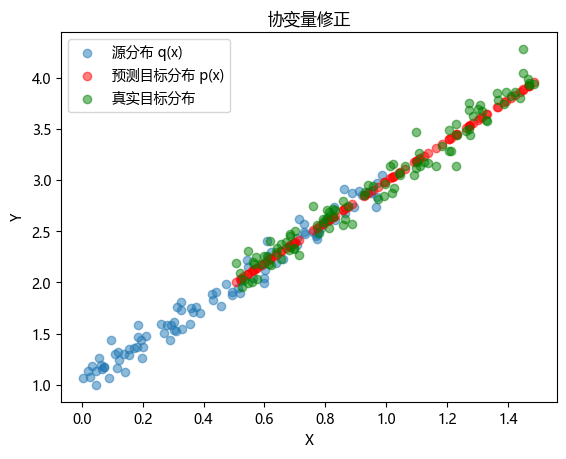

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

# 指定默认字体为微软雅黑或其他支持中文的字体
plt.rcParams['font.family'] = 'Microsoft YaHei'
# 设置正常显示负号（可选）
plt.rcParams['axes.unicode_minus'] = False

# 生成样本数据，并引入协变量偏移
np.random.seed(42)
n = 100

# 生成源分布 q(x) 数据
X_train_q = np.random.rand(n, 1) #源分布的特征数据
y_train = 2 * X_train_q + 1 + 0.1 * np.random.randn(n, 1) #源分布的标签

# 生成目标分布 p(x) 数据
X_test_p = X_train_q + 0.5 #目标分布特征数据
y_test = 2 * X_test_p + 1 + 0.1 * np.random.randn(n, 1) #目标分布的真实标签

# 生成二元分类训练集
X_classifier = np.vstack([X_train_q, X_test_p])
y_classifier = np.array([-1] * n + [1] * n)

# 使用对数几率回归训练二元分类器
classifier = LogisticRegression()
classifier.fit(X_classifier, y_classifier)

# 计算训练数据的权重
beta = np.exp(classifier.predict_log_proba(X_train_q)[:, 1])
c = 10  # 将 beta 截断到 c
beta_clipped = np.minimum(beta, c)

# 使用权重 beta 进行加权经验风险最小化
linear_regression = LinearRegression()
linear_regression.fit(X_train_q, y_train, sample_weight=beta_clipped)

# 预测目标分布 p(x) 的输出，并绘制结果
y_pred = linear_regression.predict(X_test_p)

plt.scatter(X_train_q, y_train, label='源分布 q(x)', alpha=0.5)
plt.scatter(X_test_p, y_pred, label='预测目标分布 p(x)', color='red', alpha=0.5)
plt.scatter(X_test_p, y_test, label='真实目标分布 ', color='g', alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('协变量修正')
plt.show()


### 4.9.3.3 标签偏移纠正

假设我们处理的是$k$个类别的分类任务。
使用4.9.3.2节中相同符号，
$q$和$p$中分别是**源分布**（例如训练时的分布）和**目标分布**（例如测试时的分布）。
假设标签的分布随时间变化：$q(y) \neq p(y)$，
但类别条件分布保持不变：$q(\mathbf{x} \mid y)=p(\mathbf{x} \mid y)$。
如果源分布$q(y)$是“错误的”，
我们可以根据公式4.9.2中定义的真实风险中的恒等式进行更正：

$$
\begin{aligned}
\int\int l(f(\mathbf{x}), y) p(\mathbf{x} \mid y)p(y) \;d\mathbf{x}dy =
\int\int l(f(\mathbf{x}), y) q(\mathbf{x} \mid y)q(y)\frac{p(y)}{q(y)} \;d\mathbf{x}dy.
\end{aligned} \tag {4.9.8}
$$

这里，重要性权重将对应于**标签似然比率**：

$$\beta_i \stackrel{\mathrm{def}}{=} \frac{p(y_i)}{q(y_i)}. \tag {4.9.9}$$

标签似然比率用于调整源分布的标签分布，使其与目标分布对齐。

标签偏移的一个好处是，如果我们在源分布上有一个相当好的模型，
那么我们可以得到对这些权重的一致估计，而不需要处理周边的其他维度。
在深度学习中，输入往往是高维对象（如图像），而**标签通常是低维**（如类别）。

为了**估计目标标签分布**，我们首先采用性能相当好的现成的分类器（通常基于训练数据进行训练），
并使用验证集（也来自训练分布）计算其**混淆矩阵**。
混淆矩阵$\mathbf{C}$是一个$k \times k$矩阵，
其中每列对应于标签类别，每行对应于模型的预测类别。
每个单元格的值$c_{ij}$是验证集中，真实标签为$j$，
而我们的模型预测为$i$的样本数量所占的比例。

现在，我们不能直接计算目标数据上的混淆矩阵，
因为我们无法看到真实环境下的样本的标签，
除非我们再搭建一个复杂的实时标注流程。
然而，我们所能做的是将所有模型在测试时的预测取平均数，
得到平均模型输出$\mu(\hat{\mathbf{y}}) \in \mathbb{R}^k$，
其中第$i$个元素$\mu(\hat{y}_i)$是我们模型预测测试集中$i$的总预测分数。

结果表明，如果我们的分类器一开始就相当准确，
并且目标数据只包含我们以前见过的类别，
以及如果标签偏移假设成立（这里最强的假设），
我们就可以通过求解一个简单的线性系统来**估计测试集的标签分布**：

$$\mathbf{C} p(\mathbf{y}) = \mu(\hat{\mathbf{y}}), \tag {4.9.10}$$

因为作为一个估计，$\sum_{j=1}^k c_{ij} p(y_j) = \mu(\hat{y}_i)$
对所有$1 \leq i \leq k$成立，
其中$p(y_j)$是$k$维标签分布向量$p(\mathbf{y})$的第$j^\mathrm{th}$元素。
如果我们的分类器一开始就足够精确，那么混淆矩阵$\mathbf{C}$将是可逆的，
进而我们可以得到一个解$p(\mathbf{y}) = \mathbf{C}^{-1} \mu(\hat{\mathbf{y}})$。

因为我们观测源数据上的标签，所以很容易估计分布$q(y)$。
那么对于标签为$y_i$的任何训练样本$i$，
我们可以使用我们估计的$p(y_i)/q(y_i)$比率来计算权重$\beta_i$，
并将其代入公式4.9.5中的加权经验风险最小化中。

- **要点：**
  - 标签偏移纠正用于处理类别分布随时间变化的情况。
  - 类条件分布保持不变：$q(\mathbf{x} \mid y)=p(\mathbf{x} \mid y)$。
  - 重要性权重对应于标签似然比率$\beta_i \stackrel{\mathrm{def}}{=} \frac{p(y_i)}{q(y_i)}$。
  - 使用混淆矩阵估计目标标签分布。
  - 通过求解线性系统来估计测试集的标签分布。
  - 计算权重$\beta_i$，并将其代入加权经验风险最小化。

------------

- **说明：混淆矩阵**

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target

# 将数据集划分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# 使用决策树分类器训练模型
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 预测验证集的结果
y_pred_val = clf.predict(X_val)

# 计算混淆矩阵
C = confusion_matrix(y_val, y_pred_val)
print("混淆矩阵：\n", C)

C_normalization = C/C.sum(axis=1)
print("归一化处理后的混淆矩阵：\n", C_normalization.round(3))

混淆矩阵：
 [[23  0  0]
 [ 0 18  1]
 [ 0  1 17]]
归一化处理后的混淆矩阵：
 [[1.    0.    0.   ]
 [0.    0.947 0.056]
 [0.    0.053 0.944]]


- 在前述示例中，我们使用鸢尾花数据集和决策树分类器。计算出混淆矩阵后，可以从以下几个方面了解模型的性能：
  - 预测准确性：**对角线**上的元素表示正确分类的样本数量所占的比例。通过计算对角线元素之和并除以所有元素之和，我们可以得到模型的**预测准确率**。
  - 误分类情况：非对角线上的元素表示被误分类的样本数量所占的比例。例如，C[i, j]（i ≠ j）表示真实标签为 i，而模型预测为 j 的样本的比例。通过分析这些值，我们可以了解哪些类别容易被误分类。
  - 类别间的错误关联：混淆矩阵中各行和各列的元素可以帮助我们了解哪些类别更容易被误分类为其他类别。例如，如果 C[i, j] 值较大，则说明类别 i 容易被误分类为类别 j。通过观察混淆矩阵的非对角线元素，我们可以发现模型在不同类别之间的错误关联。

In [4]:
# 预测准确性
accuracy = np.diag(C).sum() / C.sum()
print("预测准确率：", accuracy)

#误分类情况
misclassification_rate = 1 - accuracy
print("误分类率：", misclassification_rate)

# 类别间的错误关联
error_relationship = C - np.diag(np.diag(C))
print("类别间的错误关联：\n", error_relationship)


预测准确率： 0.9666666666666667
误分类率： 0.033333333333333326
类别间的错误关联：
 [[0 0 0]
 [0 0 1]
 [0 1 0]]


- 通过模拟数据计算目标数据的标签分布

平均模型输出： [0.18205878 0.46212909 0.35581214]
目标数据的标签分布： [0.0079156  0.02459142 0.01948357]
向量之间的欧几里得距离： 0.5786898668196775
向量之间的余弦相似度： 0.9983749784900604


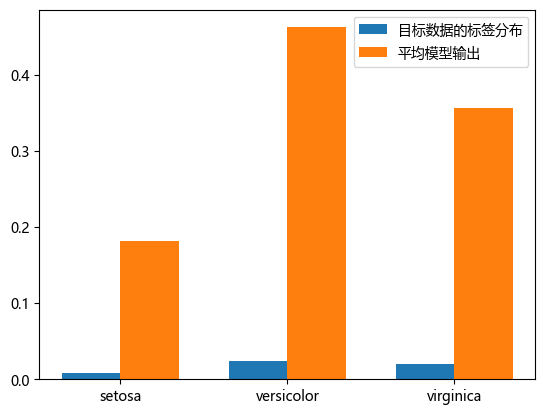

In [5]:
# 随机生成一个平均模型输出 μ(y_hat)
## 其实就是模拟数据，也就是有偏移的标签
np.random.seed(42)
mu_y_hat = np.random.rand(C.shape[0])
mu_y_hat /= mu_y_hat.sum()
print("平均模型输出：", mu_y_hat)

## 计算目标数据的标签分布,公式4.9.10
# 使用 NumPy 的 linalg.solve 函数求解线性方程组 C * p(y) = μ(y_hat)
p_y = np.linalg.solve(C, mu_y_hat)

print("目标数据的标签分布：", p_y)

# 计算向量之间的欧几里得距离：衡量两个向量之间的差异大小。
euclidean_distance = np.linalg.norm(p_y - mu_y_hat)
print("向量之间的欧几里得距离：", euclidean_distance)

# 计算向量之间的余弦相似度：衡量两个向量之间的相似程度，值越接近 1 表示越相似
cosine_similarity = np.dot(p_y, mu_y_hat) / (np.linalg.norm(p_y) * np.linalg.norm(mu_y_hat))
print("向量之间的余弦相似度：", cosine_similarity)


# 可视化向量之间的差异：通过柱状图展示各个类别在目标数据的标签分布和平均模型输出中的比例
class_labels = iris.target_names
x = np.arange(len(class_labels))
# 指定默认字体为微软雅黑或其他支持中文的字体
plt.rcParams['font.family'] = 'Microsoft YaHei'
# 设置正常显示负号（可选）
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots()
bar_width = 0.35
ax.bar(x - bar_width / 2, p_y, bar_width, label="目标数据的标签分布")
ax.bar(x + bar_width / 2, mu_y_hat, bar_width, label="平均模型输出")

ax.set_xticks(x)
ax.set_xticklabels(class_labels)
ax.legend()

plt.show()


- 在上述计算结果得到平均模型输出（`μ(y_hat)`）和目标数据的标签分布（`p(y)`）。接下来，可以通过观察这两个向量以及它们之间的距离和相似度来了解模型在新数据上的分类准确度。
  - 比较平均模型输出和目标数据的标签分布：可以看到，平均模型输出为：`[0.18205878, 0.46212909, 0.35581214]`，而目标数据的标签分布为：`[0.0079156, 0.02432258, 0.01949939]`。从数值上看，这两个向量在各个类别上的比例有很大差异，说明模型在源数据集上的表现可能与目标数据集存在一定差距。
  - 考虑向量之间的欧几里得距离和余弦相似度：向量之间的欧几里得距离为` 0.5788839669776707`，较大的值表示两个向量之间存在较大差异。然而，向量之间的余弦相似度为 `0.9983690955095258`，这个值非常接近 1，表示两个向量的方向非常接近，但它们的长度有很大差异。
- 结合这些信息，可以得出以下结论：
  - 模型在新数据上的分类准确度可能会受到影响，因为平均模型输出和目标数据的标签分布之间存在较大差异（如欧几里得距离所示）。
  - 然而，由于余弦相似度非常接近 1，这表明**模型预测结果的方向与实际目标数据分布的方向是一致**的。换句话说，模型可能仍然能够区分不同类别，但对每个类别的预测概率可能需要进行调整以适应目标数据集。
- 为了使模型更好地适应目标数据集，可以考虑以下方法：
  - 对预测概率进行校准：通过 **Platt 校准、Isotonic 校准**等方法，重新调整模型的预测概率，使其更接近目标数据集的真实分布。
  - 进行**迁移学习**或**领域自适应**：利用目标数据集的一部分（带标签或无标签）对模型进行微调，使其捕获目标数据集中的特定信息。
  - **重新训练模型**：如果源数据集和目标数据集之间的差异较大，可以考虑基于目标数据集重新训练模型，以便更好地拟合目标数据分布。

- **示例：按照公式4.9.9和4.9.10编程实现标签偏移纠正**

混淆矩阵 C:
 [[0.78571429 0.0952381  0.11904762]
 [0.11746988 0.73192771 0.15060241]
 [0.12349398 0.15662651 0.71987952]]
模型预测分数 mu:
 [0.03  0.012 0.958]
估计的目标标签分布 p(y):
 [8.38759898e-18 1.27576716e-17 1.00000000e+00]
标签似然比率 β:
 [2.79586633e-17 2.55153432e-17 5.00000000e+00]


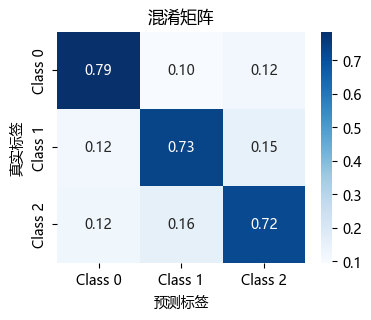

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from scipy.optimize import lsq_linear

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题
# 生成源数据
def generate_data(n_samples=1000, n_features=20, n_classes=3, random_state=0):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,
                               n_informative=10, n_redundant=0, random_state=random_state)
    return X, y

# 生成目标数据，模拟标签偏移
def generate_target_data(n_samples=500, n_classes=3):
    X_target = np.random.rand(n_samples, 20)
    
    # 直接指定目标标签的分布
    p = [0.4, 0.2, 0.4]  # 目标标签分布
    #p = np.array(p) / np.sum(p)  # 确保概率和为1
    
    y_target = np.random.choice(np.arange(n_classes), size=n_samples, p=p)
    return X_target, y_target

# 训练模型
def train_model(X_train, y_train):
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)
    return model

# 计算混淆矩阵
def compute_confusion_matrix(y_true, y_pred, n_classes):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(n_classes))
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 归一化
    return cm_normalized

# 估计目标标签分布
def estimate_label_distribution(C, mu):
    # 使用非负最小二乘法
    result = lsq_linear(C, mu, bounds=(0, np.inf))  # 设定非负约束
    p_y = result.x  # 结果
    p_y /= np.sum(p_y)  # 归一化，使其和为1
    return p_y

# 可视化混淆矩阵
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('真实标签')
    plt.xlabel('预测标签')
    plt.title('混淆矩阵')
    plt.show()

# 主程序
def main():
    # 设定源标签分布 q(y) 和目标标签分布 p(y)
    q_y = np.array([0.3, 0.5, 0.2])  # 源标签分布
    p_y_target = np.array([0.4, 0.2, 0.4])  # 目标标签分布

    # 生成源数据
    X_train, y_train = generate_data(n_samples=1000, n_features=20, n_classes=3)
    # 生成目标数据
    X_test, y_test = generate_target_data(n_samples=500, n_classes=3)

    # 训练模型
    model = train_model(X_train, y_train)

    # 在源数据上预测
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 计算混淆矩阵
    C = compute_confusion_matrix(y_train, y_train_pred, n_classes=3)
    print("混淆矩阵 C:\n", C)

    # 计算验证集的预测分数
    mu = np.array([np.mean(y_test_pred == i) for i in range(3)])
    print("模型预测分数 mu:\n", mu)

    # 估计目标标签分布
    p_y_estimated = estimate_label_distribution(C, mu)
    print("估计的目标标签分布 p(y):\n", p_y_estimated)

    # 计算源数据的标签分布
    q_y = np.array([0.3, 0.5, 0.2])  # 源标签分布，已设定

    # 计算标签似然比率
    beta = p_y_estimated / q_y  # 标签似然比率
    print("标签似然比率 β:\n", beta)

    # 可视化混淆矩阵
    plot_confusion_matrix(C, class_names=['Class 0', 'Class 1', 'Class 2'])

if __name__ == "__main__":
    main()

- **示例代码说明：**
  - **混淆矩阵 $ C $**：显示模型在训练数据上的分类表现，帮助我们理解模型在各个类别上的准确性。
  * **模型预测分数 $ \mu $**：展示模型在目标数据集上的预测分数，反映模型对每个类别的信心。
  * **估计的目标标签分布 $ p(y) $**：根据混淆矩阵和模型输出估计得到的目标标签分布。
  * **源标签分布 $ q(y) $**：展示源数据集中的标签分布，便于比较与目标标签分布的差异。
  * **标签似然比率 $ \beta $**：显示标签偏移的纠正因子，反映目标标签与源标签之间的关系。
  * **混淆矩阵可视化**：用热图形式展示混淆矩阵，使得模型的分类效果一目了然。

-----------

### 4.9.3.4 概念偏移纠正

概念偏移很难用原则性的方式解决。
例如，在一个问题突然从“区分猫和狗”偏移为“区分白色和黑色动物”的情况下，
除了从零开始收集新标签和训练，别无妙方。
幸运的是，在实践中这种极端的偏移是罕见的。
相反，通常情况下，概念的变化总是缓慢的。
比如下面是一些例子：

* 在计算广告中，新产品推出后，旧产品变得不那么受欢迎了。这意味着广告的分布和受欢迎程度是逐渐变化的，任何点击率预测器都需要随之逐渐变化。
* 由于环境的磨损，交通摄像头的镜头会逐渐退化，影响摄像头的图像质量。
* 新闻内容逐渐变化（比如出现新的新闻）。

在这种情况下，我们可以使用与训练网络相同的方法，使其适应数据的变化。
换言之，我们**使用新数据更新现有的网络权重，而不是从头开始训练**。

## 4.9.4 学习问题的分类法

有了如何处理分布变化的知识，我们现在可以考虑机器学习问题形式化的其他方面。

### 4.9.4.1 批量学习

- 在**批量学习（batch learning）** 中，可以访问一组训练特征和标签
$\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$，
并使用这些特性和标签训练$f(\mathbf{x})$。
- 然后，我们部署此模型来对来自同一分布的新数据$(\mathbf{x}, y)$进行评分。
- 例如，我们可以根据猫和狗的大量图片训练猫检测器。
- 一旦我们训练了它，我们就把它作为智能猫门计算视觉系统的一部分，来控制只允许猫进入。
- 然后这个系统会被安装在客户家中，基本再也不会更新。

### 4.9.4.2 在线学习

- 除了“批量”地学习，我们还可以**单个**“在线”学习数据$(\mathbf{x}_i, y_i)$。
- 更具体地说，我们首先观测到$\mathbf{x}_i$，
然后我们得出一个估计值$f(\mathbf{x}_i)$，
只有当我们做到这一点后，我们才观测到$y_i$。
- 然后根据我们的决定，我们会得到奖励或损失。
许多实际问题都属于这一类。
- 例如，我们需要预测明天的股票价格，
这样我们就可以根据这个预测进行交易。
在一天结束时，我们会评估我们的预测是否盈利。
- 换句话说，在**在线学习（online learning）** 中，使用以下的循环。
在这个循环中，给定新的观测结果，**不断地改进模型**。

$$
\mathrm{model} ~ f_t \longrightarrow
\mathrm{data} ~ \mathbf{x}_t \longrightarrow
\mathrm{estimate} ~ f_t(\mathbf{x}_t) \longrightarrow
\mathrm{observation} ~ y_t \longrightarrow
\mathrm{loss} ~ l(y_t, f_t(\mathbf{x}_t)) \longrightarrow
\mathrm{model} ~ f_{t+1}
$$

### 4.9.4.3 老虎机

- **老虎机（bandits）** 是上述问题的一个特例。
- 虽然在大多数学习问题中，我们有一个连续参数化的函数$f$（例如，一个深度网络）。
- 但在一个老虎机问题中，我们只有有限数量的手臂可以拉动。
也就是说，我们可以采取的行动是有限的。
- 对于这个更简单的问题，可以获得更强的最优性理论保证，这并不令人惊讶。
- 这个问题经常被视为一个单独的学习问题的情景。

----------------
- **说明：机器学习中的老虎机问题**
  - 在机器学习中，老虎机问题（Bandit Problem）是一类强化学习问题的特例，其中一个**智能体（agent）**需要在有限数量的**手臂（actions）**之间作出选择，以最大化累积奖励。每个手臂都与某种概率分布相关联，并且当拉动手臂时，智能体会从该概率分布中获得一个奖励。这类问题的关键挑战是**探索-利用权衡（exploration-exploitation trade-off）**，即智能体需要在尝试新的手臂（以获取更多信息）和利用已知手臂的收益之间进行平衡。
  - 老虎机问题可以看作是一个简化版的**强化学习问题**，因为在这里我们只关心有限数量的离散行动，而不是连续参数化的函数（如深度网络）。这使得我们能够为这类问题获得更强的最优性理论保证。换句话说，在解决老虎机问题时，我们通常可以更容易地找到最佳策略，并有数学上的证明支持这些策略的有效性。

### 4.9.4.4 控制

- 在很多情况下，环境会记住我们所做的事。不一定是以一种对抗的方式，但它会记住，而且它的反应将取决于之前发生的事情。
- 例如，咖啡锅炉控制器将根据之前是否加热锅炉来观测到不同的温度。
- 在这种情况下，PID（比例—积分—微分）控制器算法是一个流行的选择。
- 同样，一个用户在新闻网站上的行为将取决于之前向她展示的内容（例如，大多数新闻她只阅读一次）。
- 许多这样的算法形成了一个环境模型，在这个模型中，他们的行为使得他们的决策看起来不那么随机。
- 近年来，控制理论（如PID的变体）也被用于**自动调整超参数**，以获得更好的**解构和重建质量**，提高生成文本的多样性和生成图像的重建质量。

----------------
- **说明：PID控制器算法**
  - PID（比例-积分-微分）控制器是一种广泛应用于工程领域的反馈控制算法。
  - 其目标是使系统的输出跟踪期望的参考值，通过调整误差信号的比例、积分和微分部分来实现。
  - 误差信号定义为期望值与实际输出之间的差异。PID控制器可以应用于各种场景，如温度控制、速度控制等。
  - PID控制器的基本公式如下：
$$
u(t) = K_p e(t) + K_i \int_0^t e(\tau) d\tau + K_d \frac{de(t)}{dt}
$$
其中：
  - **$u(t)$**：PID控制器的输出信号。控制器通过输出这个信号来调节系统的输入，以使得系统输出趋近于期望的参考值。
  - **$e(t)$**：误差信号，是期望参考值与当前系统输出之间的差异。公式为：$e(t) = r(t) - y(t)$。
     - $r(t)$：期望的参考值，是我们希望系统达到的目标。
     - $y(t)$：当前系统输出，是实际测量到的系统状态。
  - **$K_p$（比例增益）**：比例控制部分的增益参数。比例控制根据当前误差的大小直接调整控制器输出。$K_p e(t)$项表示当前误差对控制信号的直接影响。较高的$K_p$值可以加快系统响应速度，但如果过高，可能导致系统不稳定。
  - **$K_i$（积分增益）**：积分控制部分的增益参数。积分控制根据误差随时间的累积值来调整控制器输出。$\int_0^t e(\tau) d\tau$项的作用是消除稳态误差，确保系统在长期内达到期望值。$K_i$的作用是调整积分的强度。过高的$K_i$可能导致系统过冲或振荡。
  - **$K_d$（微分增益）**：微分控制部分的增益参数。微分控制根据误差随时间的变化率来调整控制器输出。$\frac{de(t)}{dt}$项用于预测误差的趋势，帮助系统快速响应并减小超调。$K_d$的作用是调整微分的敏感度。合适的$K_d$值可以改善系统稳定性，但过高可能导致噪声放大。
  - **$t$（时间）**： 表示当前时刻，PID控制器是一个动态控制系统，随时间变化调整控制输出。
  - 通过合理调节$K_p$，$K_i$，和$K_d$这三个增益参数，PID控制器可以在不同的应用场景中实现良好的控制性能。比例部分提供了当前误差的反馈，积分部分消除稳态误差，微分部分预测误差的变化趋势，从而共同作用实现对系统的精确控制。

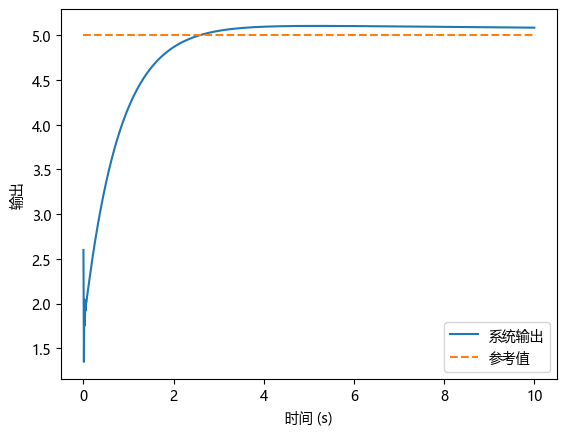

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, Kp, Ki, Kd, dt):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dt = dt
        self.integral_term = 0
        self.previous_error = 0

    def control(self, error):
        proportional_term = self.Kp * error
        self.integral_term += self.Ki * error * self.dt
        derivative_term = self.Kd * (error - self.previous_error) / self.dt
        self.previous_error = error
        
        return proportional_term + self.integral_term + derivative_term

# 模拟一个简单的系统
def simple_system(u, x, dt):
    return x + u * dt

# 参数设置
Kp = 2.0
Ki = 0.1
Kd = 0.5
dt = 0.01
sim_time = 10.0

# 实例化 PID 控制器
pid_controller = PIDController(Kp, Ki, Kd, dt)

# 初始化变量
x = 0
t = 0
reference = 5.0
time_data = []
output_data = []
reference_data = []

# 开始模拟
while t <= sim_time:
    error = reference - x
    control_signal = pid_controller.control(error)
    x = simple_system(control_signal, x, dt)
    
    time_data.append(t)
    output_data.append(x)
    reference_data.append(reference)
    
    t += dt

# 绘制结果
plt.plot(time_data, output_data, label='系统输出')
plt.plot(time_data, reference_data, label='参考值', linestyle='--')
plt.xlabel('时间 (s)')
plt.ylabel('输出')
plt.legend()
plt.show()


-------------------

### 4.9.4.5 强化学习

- **强化学习（reinforcement learning）** 强调如何基于环境而行动，以取得最大化的预期利益。
- 国际象棋、围棋、西洋双陆棋或星际争霸都是强化学习的应用实例。
- 再比如，为自动驾驶汽车制造一个控制器，或者以其他方式对自动驾驶汽车的驾驶方式做出反应
（例如，试图避开某物体，试图造成事故，或者试图与其合作）。


- 强化学习（Reinforcement Learning, RL）是一种机器学习方法，涉及智能体（agent）在环境（environment）中通过试错的方式学习如何采取行动，以最大化获得累积奖励。强化学习的重要特点是基于反馈的学习：智能体在每个时间步观察环境状态，选择动作，接收到奖励，并在此基础上调整策略。
- 强化学习的基本概念
  - **智能体（Agent）**：执行动作的实体。
  - **环境（Environment）**：智能体与之交互的外部世界。
  - **状态（State, s）**：环境在某一时刻的描述。
  - **动作（Action, a）**：智能体可以采取的行为。
  - **奖励（Reward, r）**：智能体在某一时刻采取某一动作后获得的反馈信号。
  - **策略（Policy, π）**：智能体选择动作的规则或函数，可以是确定性的，也可以是随机的。
  - **价值函数（Value Function）**：评价某一状态或状态-动作对的好坏，通常分为状态价值函数 $V(s)$ 和动作价值函数 $Q(s, a)$。
  - **折扣因子（Discount Factor, γ）**：用于度量未来奖励的重要性，范围在 [0, 1]。
- 强化学习的过程.强化学习的目标是找到一个策略，使得在长期内累积奖励最大化。智能体通常通过以下过程进行学习：
  - **探索与利用（Exploration vs Exploitation）**：
    - **探索**：尝试新的动作以发现潜在的更大奖励。
    - **利用**：选择当前已知的最佳动作以获得最大即时奖励。
  - **策略评估和改进**：
    - **策略评估**：计算当前策略下的状态或动作价值。
    - **策略改进**：根据价值函数调整策略，使得智能体行为更优。
  - **学习算法**：
    - **动态规划（Dynamic Programming）**：需要环境模型，利用贝尔曼方程进行策略迭代和价值迭代。
    - **蒙特卡罗方法（Monte Carlo Methods）**：通过完整的回合（episode）进行采样和更新。
    - **时序差分学习（Temporal-Difference Learning, TD Learning）**：结合动态规划和蒙特卡罗方法的优点，常用的有SARSA和Q-Learning。
- 深度强化学习（Deep Reinforcement Learning, DRL）
  - 深度强化学习结合了深度学习和强化学习，利用深度神经网络来处理高维度状态空间的问题。这使得强化学习能够应用于复杂的环境，如图像、视频游戏等。
  - **深度Q网络（Deep Q-Network, DQN）**：使用深度神经网络逼近动作价值函数 \(Q(s, a)\)，解决了经典Q-Learning在高维状态空间中的局限。
  - **策略梯度方法（Policy Gradient Methods）**：直接优化策略函数，常见算法有REINFORCE和Actor-Critic。
  - **先进算法**：如A3C、PPO、DDPG等，结合了多种技术，增强了稳定性和效率。
- 深度强化学习的挑战
  - **样本效率**：深度强化学习通常需要大量的数据进行训练。
  - **稳定性和收敛性**：训练过程不稳定，容易陷入局部最优。
  - **探索问题**：如何有效探索以避免过早收敛。
  - **环境复杂性和变化性**：动态和复杂的环境增加了学习难度。
- 应用领域:强化学习和深度强化学习在多个领域取得了显著成果，包括：
  - **游戏**：AlphaGo、Atari游戏。  
  - **机器人控制**：自动驾驶、机械臂控制。
  - **金融**：股票交易策略优化。
  - **智能推荐系统**：个性化推荐。

- **强化学习与深度强化学习参考书籍**

<center><img src='../img/4_9_2.png' width=300px><img src='../img/4_9_1.png' width=300px></center>
<center>图4.9.4 强化学习与深度强化学习参考书籍</center>



### 4.9.4.6 考虑到环境

- 上述不同情况之间的一个关键区别是：
在静止环境中可能一直有效的相同策略，
在**环境能够改变** 的情况下可能不会始终有效。
  - 例如，一个交易者发现的套利机会很可能在他开始利用它时就消失了。
- 环境变化的**速度和方式** 在很大程度上决定了我们可以采用的算法类型。
  - 例如，如果我们知道事情只会缓慢地变化，就可以迫使任何估计也只能缓慢地发生改变。
- 如果我们知道环境可能会瞬间发生变化，但这种变化非常罕见，我们就可以在使用算法时考虑到这一点。
- 当一个数据科学家试图解决的问题会随着时间的推移而发生变化时，这些类型的知识至关重要。
- 比如假设一个数据科学家要开发一种算法来预测股票价格走势。他使用大量历史数据训练了一个机器学习模型，该模型在训练集上表现良好。然而，在实际应用中，该模型可能无法取得同样的成功，原因如下：
  - 市场动态变化：股票市场会受到各种不确定因素的影响，如政治事件、经济数据发布、公司业绩报告等。这些因素可能导致市场瞬间发生巨大变化，使得原先基于历史数据建立的模型失去预测能力。
  - 套利机会消失：如果该预测算法在市场上被广泛应用，其他交易者也会注意到并利用这些套利机会。随着更多人追求相同的策略，套利机会会逐渐减少甚至消失，这将导致预测模型的有效性降低。
- 为了解决这类问题，数据科学家可以采取以下策略：
  - **在线学习和自适应算法：** 实时监控市场变化并适时更新模型，使其能够捕捉到市场动态。在线学习算法可以在新数据到来时持续更新模型，以适应可能的环境变化。
  - **多模型和集成学习：** 使用多个不同的预测模型，并结合它们的输出以获得更稳健的结果。当某些模型在特定情况下失效时，其他模型仍然可以提供有用的信息。这种方法可以提高算法在面对复杂、多变环境时的鲁棒性。
  - **异常检测和风险管理：** 设计算法以检测潜在的市场异常或突发事件，并相应地调整预测策略。此外，可以设置止损点和风险管理规则，以便在不利情况下限制损失。

## 4.9.5 机器学习中的公平、责任和透明度

最后，重要的是，当你部署机器学习系统时，
你不仅仅是在优化一个预测模型，
而你通常是在提供一个会被用来（部分或完全）进行自动化决策的工具。
这些技术系统可能会通过其进行的决定而影响到每个人的生活。

从考虑预测到决策的飞跃不仅提出了新的技术问题，
而且还提出了一系列必须仔细考虑的伦理问题。
如果我们正在部署一个医疗诊断系统，我们需要知道它可能适用于哪些人群，哪些人群可能无效。
忽视对一个亚群体的幸福的可预见风险可能会导致我们执行劣质的护理水平。
此外，一旦我们规划整个决策系统，我们必须退后一步，重新考虑如何评估我们的技术。
在这个视野变化所导致的结果中，我们会发现精度很少成为合适的衡量标准。
例如，当我们将预测转化为行动时，我们通常会考虑到各种方式犯错的潜在成本敏感性。
举个例子：将图像错误地分到某一类别可能被视为种族歧视，而错误地分到另一个类别是无害的，
那么我们可能需要相应地调整我们的阈值，在设计决策方式时考虑到这些社会价值。
我们还需要注意预测系统如何导致反馈循环。
例如，考虑预测性警务系统，它将巡逻人员分配到预测犯罪率较高的地区。
很容易看出一种令人担忧的模式是如何出现的：

 1. 犯罪率高的社区会得到更多的巡逻。
 2. 因此，在这些社区中会发现更多的犯罪行为，输入可用于未来迭代的训练数据。
 3. 面对更多的积极因素，该模型预测这些社区还会有更多的犯罪。
 4. 下一次迭代中，更新后的模型会更加倾向于针对同一个地区，这会导致更多的犯罪行为被发现等等。

通常，在建模纠正过程中，模型的预测与训练数据耦合的各种机制都没有得到解释，
研究人员称之为“失控反馈循环”的现象。
此外，我们首先要注意我们是否解决了正确的问题。
比如，预测算法现在在信息传播中起着巨大的中介作用，
个人看到的新闻应该由他们喜欢的Facebook页面决定吗？
这些只是你在机器学习职业生涯中可能遇到的令人感到“压力山大”的道德困境中的一小部分。

- **要点：**
  - 部署机器学习系统时需要考虑公平、责任和透明度。
    - 比如历史上男性或某种族的录用率更高。
  - 自动化决策工具可能影响到每个人的生活。
    - 比如信用评分机器学习系统，其决定可能会影响个人获得贷款的机会。
  - 考虑预测到决策的跨越所涉及的伦理问题。
  - 必须了解医疗诊断系统可能适用于哪些人群，哪些人群可能无效。
    - 医疗诊断系统中，如果机器学习模型对某些人群（如少数族裔或特定年龄段的人）表现不佳，可能会导致这些人群得不到准确的诊断和适当的治疗
  - 精度很少成为合适的衡量标准，考虑各种方式犯错的潜在成本敏感性。
    - 比如检测网上仇恨言论的系统，其精度可能很高，但如果错误分类的成本很高（例如，将无害的言论误判为仇恨言论，或将仇恨言论误判为无害），则需要仔细考虑这些错误的社会影响。 
  - 注意预测系统如何导致反馈循环以及失控反馈循环现象。
    - 在预测性警务系统中，系统将巡逻人员分配到预测犯罪率较高的地区。
    - 由于这些地区得到更多的巡逻，更多的犯罪行为被发现，新的数据又进一步强化了对这些地区的高犯罪预测，导致一个失控的反馈循环
  - 在设计决策方式时考虑社会价值和道德困境。
    - 社交媒体平台使用预测算法决定用户看到的新闻内容，这可能导致信息茧房（即用户只接触到与其已有观念一致的信息），加强社会分裂和偏见。

## 小结

* 在许多情况下，训练集和测试集并不来自同一个分布。这就是所谓的分布偏移。
* 真实风险是从真实分布中抽取的所有数据的总体损失的预期。然而，这个数据总体通常是无法获得的。经验风险是训练数据的平均损失，用于近似真实风险。在实践中，我们进行经验风险最小化。
* 在相应的假设条件下，可以在测试时检测并纠正协变量偏移和标签偏移。在测试时，不考虑这种偏移可能会成为问题。
* 在某些情况下，环境可能会记住自动操作并以令人惊讶的方式做出响应。在构建模型时，我们必须考虑到这种可能性，并继续监控实时系统，并对我们的模型和环境以意想不到的方式纠缠在一起的可能性持开放态度。